# i - Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [2]:
# Import Libraries

# Buat memproses data
import pandas as pd
import numpy as np

# Buat memproses grafik
import seaborn as sns
import matplotlib.pyplot as plt

# Buat Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

# Buat definisi model
from sklearn.linear_model import LinearRegression

# Buat evaluasi model
from sklearn.metrics import mean_absolute_error

# Buat import hasil model saving
import pickle
import json

# ii - Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.



In [2]:
# Import Google Drive buat ambil kaggle json, disini saya simpan di google drive agar tidak bolak balik upload
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
!mkdir /root/.kaggle                                                                  # Membuat folder .kaggle di /root
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' /root/.kaggle/kaggle.json    # Mengcopy kaggle.json ke folder /root/.kaggle
!kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma                   # Mendownload dataset dari Kaggle
!unzip -n /content/uber-and-lyft-dataset-boston-ma.zip                                # Ekstrak download dari kaggle, -n = never overwrite

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists
uber-and-lyft-dataset-boston-ma.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/uber-and-lyft-dataset-boston-ma.zip


In [4]:
# Load dataset
data_ori = pd.read_csv ('Uber and Lyft.csv')              # Memasukkan csv menjadi dataframe
data = data_ori.copy()                                    # Menduplikat data agar memiliki data asli dan data yang diproses
data                                                      # Menampilkan isi dataframe

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [4]:
# Mengambil kolom yang tidak dipakai
data = data.drop(['id', 'timestamp', 'datetime', 'timezone', 'product_id', 'surge_multiplier', 'latitude', 'longitude', 'long_summary', 'icon'], axis=1)
data

,hour,day,month,source,destination,cab_type,name,price,distance,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,42.34,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,43.58,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,38.33,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,34.38,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,37.44,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,23,1,12,West End,North End,Uber,UberXL,13.0,1.00,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,23,1,12,West End,North End,Uber,UberX,9.5,1.00,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,23,1,12,West End,North End,Uber,Taxi,NaN,1.00,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,23,1,12,West End,North End,Uber,Black SUV,27.0,1.00,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [5]:
# Mengecek tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         693071 non-null  int64  
 1   day                          693071 non-null  int64  
 2   month                        693071 non-null  int64  
 3   source                       693071 non-null  object 
 4   destination                  693071 non-null  object 
 5   cab_type                     693071 non-null  object 
 6   name                         693071 non-null  object 
 7   price                        637976 non-null  float64
 8   distance                     693071 non-null  float64
 9   temperature                  693071 non-null  float64
 10  apparentTemperature          693071 non-null  float64
 11  short_summary                693071 non-null  object 
 12  precipIntensity              693071 non-null  float64
 13 

In [6]:
# Mengecek data null, terlihat pada kolom price terdapat 55095
data.isnull().sum()

hour                               0
day                                0
month                              0
source                             0
destination                        0
cab_type                           0
name                               0
price                          55095
distance                           0
temperature                        0
apparentTemperature                0
short_summary                      0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
temperatureHighTime                0
temperatureLow                     0
temperatureLowTime                 0
apparentTemperatureHigh            0
apparentTemperatureHighTime        0
apparentTemperatureLow             0
apparentTemperatureLowTime         0
d

In [7]:
# Mengecek data null sebagai persenan total data
data.isnull().mean()

hour                           0.000000
day                            0.000000
month                          0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
name                           0.000000
price                          0.079494
distance                       0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000
windGust                       0.000000
windGustTime                   0.000000
visibility                     0.000000
temperatureHigh                0.000000
temperatureHighTime            0.000000
temperatureLow                 0.000000
temperatureLowTime             0.000000
apparentTemperatureHigh        0.000000
apparentTemperatureHighTime    0.000000


In [8]:
# Mengecek data statistik
data.describe()

,hour,day,month,price,distance,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,11.619137,17.794365,11.586684,16.545125,2.189430,39.584388,35.881222,0.008922,0.146076,0.741119,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.948114,9.982286,0.492429,9.324359,1.138937,6.726084,7.918707,0.026901,0.328938,0.138595,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,0.000000,1.000000,11.000000,2.500000,0.020000,18.910000,12.130000,0.000000,0.000000,0.380000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,6.000000,13.000000,11.000000,9.000000,1.280000,36.450000,31.910000,0.000000,0.000000,0.640000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,12.000000,17.000000,12.000000,13.500000,2.160000,40.490000,35.900000,0.000000,0.000000,0.710000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,18.000000,28.000000,12.000000,22.500000,2.920000,43.580000,40.080000,0.000000,0.000000,0.880000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,23.000000,30.000000,12.000000,97.500000,7.860000,57.220000,57.220000,0.144700,1.000000,0.960000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


# iii - Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.



## Ingin melihat persebaran `price` pada dataset

Nilai Skewness : 1.05


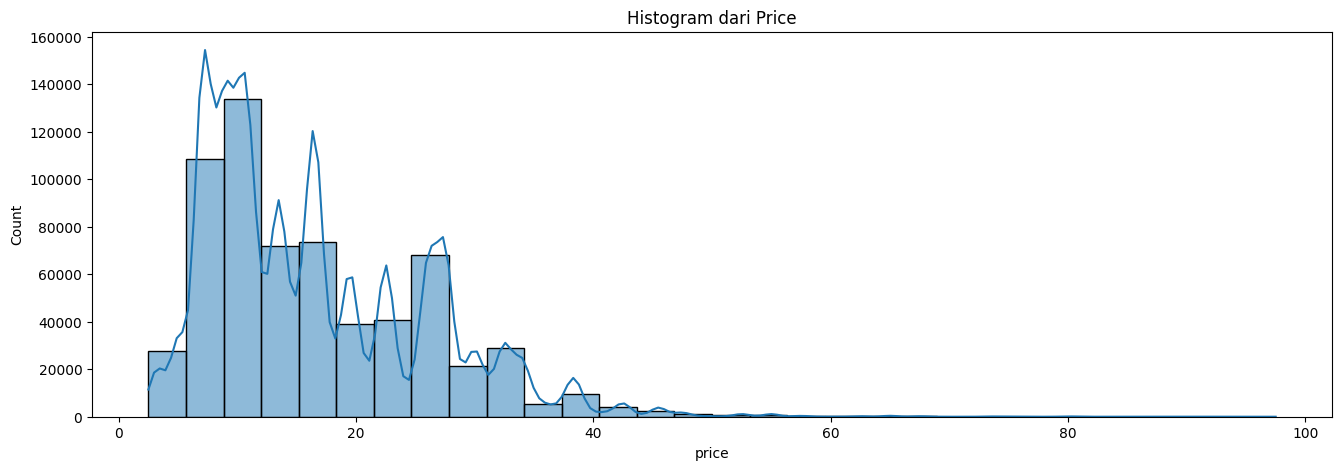

In [9]:
# Membuat Histogram
plt.figure(figsize = (16, 5))
sns.histplot(data['price'], kde=True, bins=30)
plt.title('Histogram dari Price')

# Melihatkan nilai skewness dari Price
print ('Nilai Skewness :', data['price'].skew().round(decimals=2))

Terlihat bahwa data `price` memiliki kurva yang condong ke kiri, dan memiliki skewness 1.05 yang merupakan `highly skewed`

## Ingin melihat perbandingan antara `distance` dan `price` pada tiap `cab_type` dan `name`

<function matplotlib.pyplot.show(close=None, block=None)>

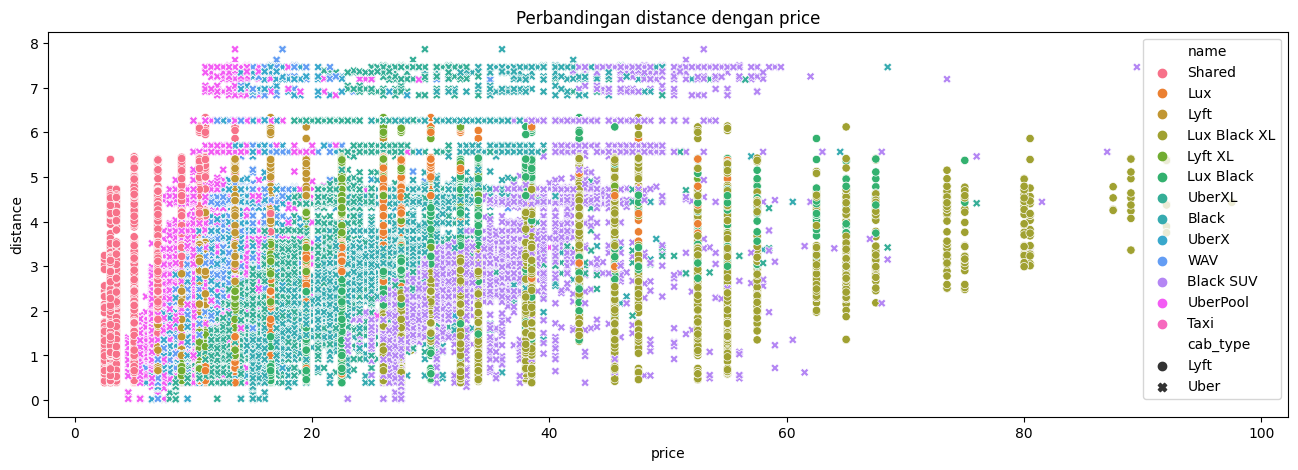

In [10]:
# Membuat scatterplot
plt.figure(figsize = (16, 5))
sns.scatterplot(x='price', y='distance', data=data, hue="name", style ='cab_type')
plt.title ('Perbandingan distance dengan price')
plt.legend (loc='upper right')
plt.show

Berdasarkan grafik diatas, adanya pengaruh antara `distance` dengan `price` yang dimana semakin tinggi `distance` juga semakin tinggi `price`nya, dan dapat dilihat bahwa yang paling murah adalah `Lyft` yang menggunakan `shared` dan yang paling mahal adalah `Lyft` yang menggunakan `Lux Black XL`.

## Ingin melihat perbandingan tiap-tiap `name`

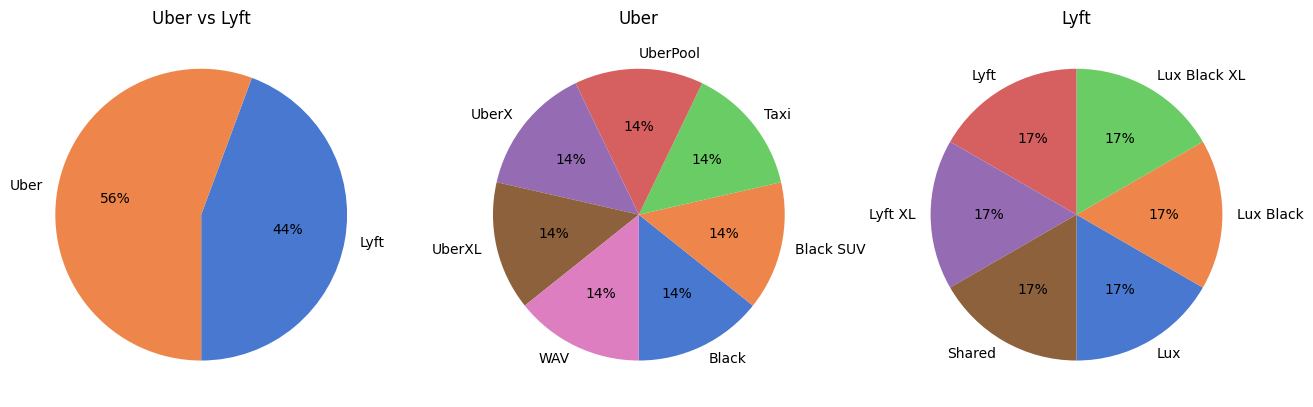

In [11]:
# Membuat pie chart
palette_color = sns.color_palette('muted')
plt.figure(figsize = (16, 5))

ax1 = plt.subplot(1, 3, 1)
plt.pie(data_ori.groupby(['cab_type'])['name'].count(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=data_ori['cab_type'].unique())
ax1 = plt.title ('Uber vs Lyft')


ax2 = plt.subplot(1, 3, 2)
plt.pie(data_ori[data_ori.cab_type == 'Uber'].groupby('name')['name'].count(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=data_ori[data_ori.cab_type == 'Uber'].groupby('name')['name'].groups.keys())
ax2 = plt.title ('Uber')

ax3 = plt.subplot(1, 3, 3)
plt.pie(data_ori[data_ori.cab_type == 'Lyft'].groupby('name')['name'].count(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=data_ori[data_ori.cab_type == 'Lyft'].groupby('name')['name'].groups.keys())
ax3 = plt.title ('Lyft')

plt.show()

Dari pie chart diatas, Uber lebih dominan dibandingkan Lyft dimana Uber sejumlah 56% dan Lyft hanya 44%, Uber dan Lyft memiliki persenan `name` yang merata, tidak ada yang dominan.

## Ingin melihat perbandingan price dan hour

<function matplotlib.pyplot.show(close=None, block=None)>

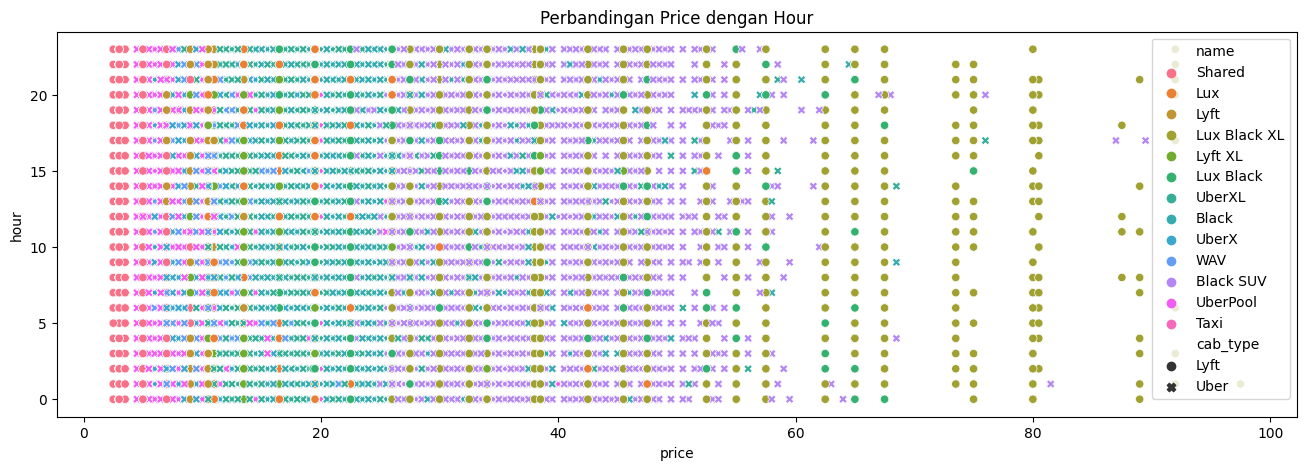

In [12]:
# Membuat scatterplot
plt.figure(figsize = (16, 5))
sns.scatterplot(x='price', y='hour', data=data_ori, hue="name", style ='cab_type')
plt.title ('Perbandingan Price dengan Hour')
plt.legend (loc='upper right')
plt.show

Berdasarkan scatterplot diatas, tidak adanya korelasi antara `Price` dengan `Hour`, yang berpengaruh hanya pada tiap `name` saja

# iv - Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



## Handle Missing Values

In [13]:
# Membuang data kosong pada dataset

data = data.dropna()
data

,hour,day,month,source,destination,cab_type,name,price,distance,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,42.34,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,43.58,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,38.33,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,34.38,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,37.44,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,West End,North End,Uber,WAV,9.5,1.00,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,23,1,12,West End,North End,Uber,UberXL,13.0,1.00,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,23,1,12,West End,North End,Uber,UberX,9.5,1.00,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,23,1,12,West End,North End,Uber,Black SUV,27.0,1.00,37.05,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


## Membagi menjadi X (Features) dan y (Target)

In [14]:
X = data.drop (['price'], axis=1)
y = data['price']

print(X.shape)
print(y.shape)

(637976, 46)
(637976,)


## Split between Train-Set and Test-Set

In [15]:
# Splitting betwen Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 15)

print ('X Train Size', X_train.shape)
print ('X Test Size:', X_test.shape)
print ()
print ('y Train Size', y_train.shape)
print ('y Test Size:', y_test.shape)

X Train Size (510380, 46)
X Test Size: (127596, 46)

y Train Size (510380,)
y Test Size: (127596,)


## Handle Outlier
Melihat apakah ada atau tidaknya outlier pada data

Skewness Value :  1.05


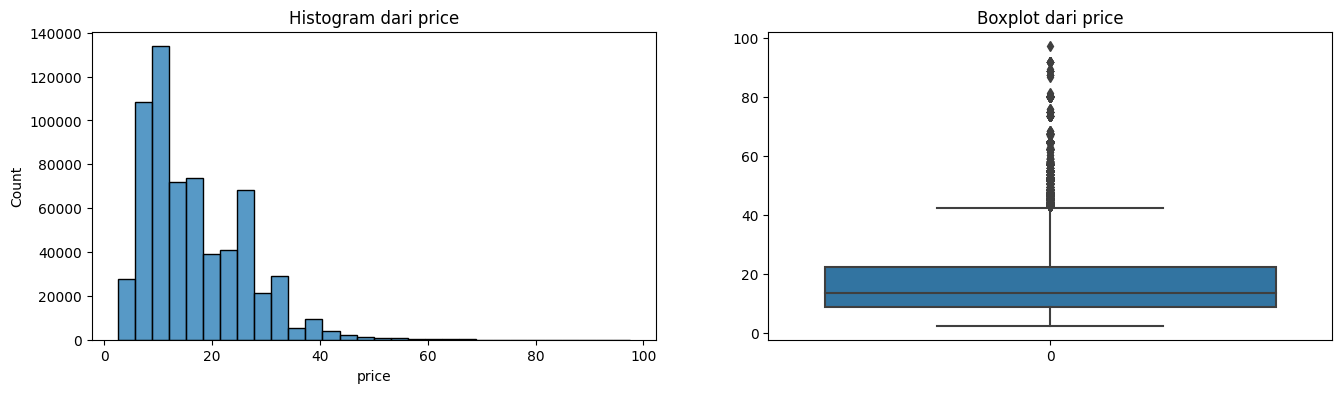

In [16]:
print('Skewness Value : ', data['price'].skew().round(decimals=2))

plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=30)
plt.title('Histogram dari price')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data['price'])
plt.title('Boxplot dari price')

plt.show()

### Membuat outlier

In [17]:
# Membuat nilai 25 quantil yang disebut Q1 dan 75 quantil yang disebut Q3
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
print ('Nilai Q1: ', Q1)
print ('Nilai Q3: ', Q3)

# Membuat nilai IQR, dari Q3 - Q1
IQR = Q3 - Q1
print ('Nilai IQR: ', IQR)

Nilai Q1:  9.0
Nilai Q3:  22.5
Nilai IQR:  13.5


In [18]:
# Membuat nilai batas bawah dengan rumus Q1 - (IQR * 1.5)
BatasBawah = Q1 - (IQR * 1.5)

# Membuat nilai batas atas dengan rumus Q3 + (IQR * 1.5)
BatasAtas = Q3 + (IQR * 1.5)

print ('Nilai Batas Bawah: ', BatasBawah)
print ('Nilai Batas Atas: ', BatasAtas)

Nilai Batas Bawah:  -11.25
Nilai Batas Atas:  42.75


### Trimming
Outliers should be detected AND **removed ONLY** from the training set, and NOT from the test set. So we should first divide our data set into train and tests, and remove outliers in the train set, but keep those in the test set, and measure how well our model is doing.

In [19]:
# Menghilangkan angka-angka yang berada diluar batas bawah maupun batas atas
y_train = y_train[(y_train > BatasBawah) & (y_train < BatasAtas)]

# Menampilkan jumlah nilai, sebelum dan sesudah dihilangkan datanya
print (data.shape[0])    #Nilai sebelum
print (y_train.shape[0]) #Nilai setelah

637976
505884


## Feature Selection

### Display X_train

In [20]:
# Memperlihatkan X_train
X_train = X_train.filter(items=y_train.index,axis=0)
print(X_train.shape)

(505884, 46)


In [21]:
# Menghilangkan kolom 'cab_type'
X_train.drop('cab_type', axis=1, inplace=True)
X_test.drop('cab_type', axis=1, inplace=True)

X_train

,hour,day,month,source,destination,name,distance,temperature,apparentTemperature,short_summary,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
299874,17,18,12,Financial District,Fenway,WAV,4.48,30.78,20.93,Clear,...,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200
93564,6,3,12,Theatre District,South Station,UberX,0.55,45.58,45.58,Foggy,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
684296,9,18,12,North End,Financial District,Lux,1.12,26.21,14.47,Overcast,...,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200
171421,3,17,12,Northeastern University,Back Bay,WAV,1.64,40.45,34.66,Light Rain,...,0.1254,1544979600,38.94,1544954400,43.73,1544990400,33.99,1545019200,38.39,1544986800
191706,0,28,11,Northeastern University,Beacon Hill,UberXL,2.63,39.13,34.07,Clear,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47986,13,16,12,North End,West End,Shared,1.23,42.11,37.54,Overcast,...,0.1261,1544979600,39.28,1544954400,43.80,1544990400,33.84,1545019200,38.35,1544986800
38500,14,27,11,Beacon Hill,Northeastern University,Lux Black XL,2.50,42.01,37.66,Overcast,...,0.1430,1543338000,35.84,1543377600,46.24,1543320000,31.95,1543377600,43.32,1543320000
683443,6,2,12,Boston University,Theatre District,UberPool,2.98,37.96,37.96,Overcast,...,0.0956,1543770000,36.10,1543726800,50.37,1543784400,35.88,1543748400,49.70,1543784400
216450,0,17,12,Back Bay,South Station,Lux,2.71,40.93,35.58,Rain,...,0.1254,1544979600,38.94,1544954400,43.73,1544990400,33.99,1545019200,38.39,1544986800


### Split between Numeric Columns and Category Columns

In [22]:
# Membuat kolom yang berisi tipe data number dan category
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(exclude=np.number).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['hour', 'day', 'month', 'distance', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']
Cat Columns :  ['source', 'destination', 'name', 'short_summary']


In [23]:
# Memisahkan train-set dan test-set berdasarkan tipe kolom
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]
X_train_cat

,source,destination,name,short_summary
299874,Financial District,Fenway,WAV,Clear
93564,Theatre District,South Station,UberX,Foggy
684296,North End,Financial District,Lux,Overcast
171421,Northeastern University,Back Bay,WAV,Light Rain
191706,Northeastern University,Beacon Hill,UberXL,Clear
...,...,...,...,...
47986,North End,West End,Shared,Overcast
38500,Beacon Hill,Northeastern University,Lux Black XL,Overcast
683443,Boston University,Theatre District,UberPool,Overcast
216450,Back Bay,South Station,Lux,Rain


## Feature Scaling

In [24]:
# Melihat data `X_train_num`

X_train_num

,hour,day,month,distance,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
299874,17,18,12,4.48,30.78,20.93,0.0000,0.00,0.40,12.73,...,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200
93564,6,3,12,0.55,45.58,45.58,0.0000,0.00,0.96,1.25,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
684296,9,18,12,1.12,26.21,14.47,0.0000,0.00,0.51,14.30,...,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200
171421,3,17,12,1.64,40.45,34.66,0.0591,1.00,0.91,8.96,...,0.1254,1544979600,38.94,1544954400,43.73,1544990400,33.99,1545019200,38.39,1544986800
191706,0,28,11,2.63,39.13,34.07,0.0000,0.00,0.73,7.03,...,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47986,13,16,12,1.23,42.11,37.54,0.0000,0.00,0.70,7.26,...,0.1261,1544979600,39.28,1544954400,43.80,1544990400,33.84,1545019200,38.35,1544986800
38500,14,27,11,2.50,42.01,37.66,0.0015,0.32,0.91,6.82,...,0.1430,1543338000,35.84,1543377600,46.24,1543320000,31.95,1543377600,43.32,1543320000
683443,6,2,12,2.98,37.96,37.96,0.0000,0.00,0.84,1.90,...,0.0956,1543770000,36.10,1543726800,50.37,1543784400,35.88,1543748400,49.70,1543784400
216450,0,17,12,2.71,40.93,35.58,0.1044,0.99,0.90,8.29,...,0.1254,1544979600,38.94,1544954400,43.73,1544990400,33.99,1545019200,38.39,1544986800


In [25]:
# Membuat scaling berdasarkan MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.73913043, 0.5862069 , 1.        , ..., 1.        , 0.10902655,
        1.        ],
       [0.26086957, 0.06896552, 1.        , ..., 0.38018018, 0.9699115 ,
        0.34644195],
       [0.39130435, 0.5862069 , 1.        , ..., 1.        , 0.10902655,
        1.        ],
       ...,
       [0.26086957, 0.03448276, 1.        , ..., 0.30630631, 0.73451327,
        0.31086142],
       [0.        , 0.55172414, 1.        , ..., 0.94234234, 0.33415929,
        0.93632959],
       [0.91304348, 0.89655172, 0.        , ..., 0.12072072, 0.53699115,
        0.06928839]])

## Feature Encoding

In [26]:
# melihat data `X_train_cat`

X_train_cat

,source,destination,name,short_summary
299874,Financial District,Fenway,WAV,Clear
93564,Theatre District,South Station,UberX,Foggy
684296,North End,Financial District,Lux,Overcast
171421,Northeastern University,Back Bay,WAV,Light Rain
191706,Northeastern University,Beacon Hill,UberXL,Clear
...,...,...,...,...
47986,North End,West End,Shared,Overcast
38500,Beacon Hill,Northeastern University,Lux Black XL,Overcast
683443,Boston University,Theatre District,UberPool,Overcast
216450,Back Bay,South Station,Lux,Rain


In [27]:
X_train_cat['short_summary'].unique()

array([' Clear ', ' Foggy ', ' Overcast ', ' Light Rain ', ' Drizzle ',
       ' Mostly Cloudy ', ' Partly Cloudy ', ' Rain ',
       ' Possible Drizzle '], dtype=object)

In [28]:
# Menggunakan encoder OrdinalEncoder

encoder = OrdinalEncoder(
    categories=[['Financial District', 'Theatre District', 'North End', 'Northeastern University', 'Fenway', 'South Station', 'Beacon Hill', 'North Station', 'Back Bay', 'Boston University', 'Haymarket Square', 'West End'],
                ['Fenway', 'South Station', 'Financial District', 'Back Bay', 'Beacon Hill', 'Northeastern University', 'Theatre District', 'Haymarket Square', 'West End', 'Boston University', 'North End', 'North Station'],
                ['WAV', 'UberX', 'Lux', 'UberXL', 'UberPool', 'Lux Black XL', 'Shared', 'Black SUV', 'Lux Black', 'Lyft XL', 'Lyft', 'Black'],
                [' Clear ', ' Foggy ', ' Overcast ', ' Light Rain ', ' Drizzle ', ' Mostly Cloudy ', ' Partly Cloudy ', ' Rain ', ' Possible Drizzle ']])

X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

print(X_train_cat_encoded)

[[ 0.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 2.  2.  2.  2.]
 ...
 [ 9.  6.  4.  2.]
 [ 8.  1.  2.  7.]
 [11.  9.  3.  5.]]


## Concate between Numeric Columns and Category Columns

In [29]:
print(X_train_num_scaled.shape)
print(X_train_cat_encoded.shape)

(505884, 41)
(505884, 4)


In [30]:
# Menggabungkan numerik dan kategori

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[0.73913043, 0.5862069 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26086957, 0.06896552, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.39130435, 0.5862069 , 1.        , ..., 2.        , 2.        ,
        2.        ],
       ...,
       [0.26086957, 0.03448276, 1.        , ..., 6.        , 4.        ,
        2.        ],
       [0.        , 0.55172414, 1.        , ..., 1.        , 2.        ,
        7.        ],
       [0.91304348, 0.89655172, 0.        , ..., 9.        , 3.        ,
        5.        ]])

In [31]:
# Membuat dataframe `X_train_final`

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,hour,day,month,distance,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,...,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,source,destination,name,short_summary
0,0.739130,0.586207,1.0,0.568878,0.309841,0.195165,0.000000,0.00,0.034483,0.843986,...,0.182266,1.000000,0.011331,1.000000,0.109027,1.000000,0.0,0.0,0.0,0.0
1,0.260870,0.068966,1.0,0.067602,0.696163,0.741850,0.000000,0.00,1.000000,0.054983,...,0.965107,0.357274,0.994688,0.380180,0.969912,0.346442,1.0,1.0,1.0,1.0
2,0.391304,0.586207,1.0,0.140306,0.190551,0.051896,0.000000,0.00,0.224138,0.951890,...,0.182266,1.000000,0.011331,1.000000,0.109027,1.000000,2.0,2.0,2.0,2.0
3,0.130435,0.551724,1.0,0.206633,0.562255,0.499667,0.408431,1.00,0.913793,0.584880,...,0.419540,0.939227,0.785411,0.942342,0.334159,0.936330,3.0,3.0,0.0,3.0
4,0.000000,0.931034,0.0,0.332908,0.527800,0.486582,0.000000,0.00,0.603448,0.452234,...,0.546798,0.084715,0.716714,0.120721,0.527434,0.069288,3.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505879,0.565217,0.517241,1.0,0.154337,0.605586,0.563540,0.000000,0.00,0.551724,0.468041,...,0.422414,0.939227,0.780099,0.942342,0.332743,0.936330,2.0,8.0,6.0,2.0
505880,0.608696,0.896552,0.0,0.316327,0.602976,0.566201,0.010366,0.32,0.913793,0.437801,...,0.522578,0.084715,0.713173,0.120721,0.508673,0.069288,6.0,5.0,5.0,2.0
505881,0.260870,0.034483,1.0,0.377551,0.497259,0.572854,0.000000,0.00,0.793103,0.099656,...,0.692118,0.322284,0.852337,0.306306,0.734513,0.310861,9.0,6.0,4.0,2.0
505882,0.000000,0.551724,1.0,0.343112,0.574785,0.520071,0.721493,0.99,0.896552,0.538832,...,0.419540,0.939227,0.785411,0.942342,0.334159,0.936330,8.0,1.0,2.0,7.0


# v - Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.



In [32]:
model_lin_reg = LinearRegression()

# vi - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.





In [33]:
X_train_final

array([[0.73913043, 0.5862069 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26086957, 0.06896552, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.39130435, 0.5862069 , 1.        , ..., 2.        , 2.        ,
        2.        ],
       ...,
       [0.26086957, 0.03448276, 1.        , ..., 6.        , 4.        ,
        2.        ],
       [0.        , 0.55172414, 1.        , ..., 1.        , 2.        ,
        7.        ],
       [0.91304348, 0.89655172, 0.        , ..., 9.        , 3.        ,
        5.        ]])

In [34]:
y_train

299874    13.0
93564      7.0
684296    13.5
171421     9.5
191706    16.0
          ... 
47986      5.0
38500     32.5
683443     8.0
216450    32.5
484596    16.5
Name: price, Length: 505884, dtype: float64

In [35]:
model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

# vii - Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.



In [36]:
# Predict Train-Set and Test-Set

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([18.45597398,  9.41291134, 11.45693599, ..., 17.21525978,
       15.34096575, 16.15884465])

In [37]:
# Display `y_train`

y_train

299874    13.0
93564      7.0
684296    13.5
171421     9.5
191706    16.0
          ... 
47986      5.0
38500     32.5
683443     8.0
216450    32.5
484596    16.5
Name: price, Length: 505884, dtype: float64

## Model Evaluation using MAE

In [38]:
print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test Set : ', mean_absolute_error(y_test, y_pred_test))

Error - Train Set :  6.3646771007733145
Error - Test Set :  6.556776039579107


Model tersebut tergolong under-fit, karena nilai Train yang lebih rendah dibandingkan nilai Test



In [39]:
print(X_test.shape)
print(y_test.shape)

(127596, 45)
(127596,)


## Linear Regression

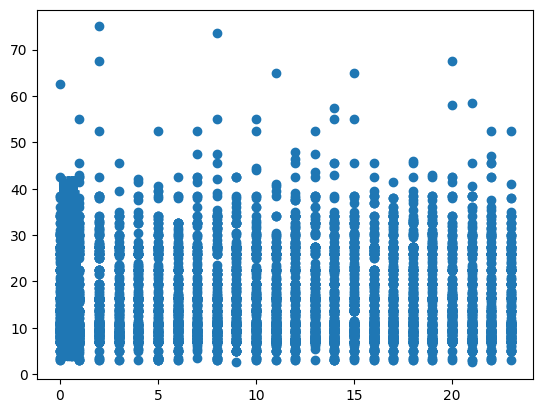

In [40]:
model_lin_reg.fit(X_train_final, y_train)

plt.scatter(X_test.iloc[:5000, 0], y_test[:5000])
plt.plot(X_train_final[:5000, 0], y_train[:5000])
plt.show()

Berdasarkan grafik diatas, asumsi dari Linear Regression adalah **Lack of Multicollinearity**, dimana prediksinya tidak berkorelasi antara satu dengan yang lainnya

# viii - Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.



In [41]:
# Save the Files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

# ix - Model Inference
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.



In [42]:
# Load All Files

with open('model_lin_reg.pkl', 'rb') as file_1:
  model_lin_reg = pickle.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = pickle.load(file_2)

with open('model_encoder.pkl','rb') as file_3:
  model_encoder = pickle.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat_cols.txt', 'r') as file_5:
  list_cat_cols = json.load(file_5)

In [43]:
# Create New Data

data_inf = {
    "hour": 15,
    "day": 15,
    "month": 11,
    "source": 'Back Bay',
    "destination": 'Northeastern University',
    "name" : 'Shared',
    "distance": 1.08,
    "temperature": 39.15,
    "apparentTemperature": 40,
    "short_summary": ' Rain ',
    "precipIntensity": 0.1509,
    "precipProbability": 1,
    "humidity": 0.95,
    "windSpeed": 10,
    "windGust": 10,
    "windGustTime": 1543334400,
    "visibility": 10,
    "temperatureHigh": 50,
    "temperatureHighTime": 1543510800,
    "temperatureLow": 28.9,
    "temperatureLowTime": 1543579200,
    "apparentTemperatureHigh": 38.53,
    "apparentTemperatureHighTime": 1543510800,
    "apparentTemperatureLow": 26.2,
    "apparentTemperatureLowTime": 1543575600,
    "dewPoint": 26.44,
    "pressure": 1013.73,
    "windBearing": 310,
    "cloudCover": 0,
    "uvIndex": 0,
    "visibility.1": 10,
    "ozone": 315.7,
    "sunriseTime": 1543319437,
    "sunsetTime": 1543353364,
    "moonPhase": 0.68,
    "precipIntensityMax": 0.1064,
    "uvIndexTime": 1543338000,
    "temperatureMin": 35.36,
    "temperatureMinTime": 1543377600,
    "temperatureMax": 47.55,
    "temperatureMaxTime": 1543320000,
    "apparentTemperatureMin": 31.04,
    "apparentTemperatureMinTime": 1543377600,
    "apparentTemperatureMax": 44.12,
    "apparentTemperatureMaxTime": 1543320000
}

data_inf = pd.DataFrame([data_inf])
data_inf

,hour,day,month,source,destination,name,distance,temperature,apparentTemperature,short_summary,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,15,15,11,Back Bay,Northeastern University,Shared,1.08,39.15,40,Rain,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [44]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]

In [45]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)

In [46]:
# Predict using Linear Regression

y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf

array([13.09096508])

# x - Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.



In [47]:
# Get Intercept and Slope

print('Intercept : ', model_lin_reg.intercept_.round(decimals=2))
print('Slope : ', model_lin_reg.coef_.round(decimals=2))

Intercept :  9.35
Slope :  [-1.0000e-02  3.1000e-01  4.0000e-01  1.9700e+01 -1.7500e+00  6.6000e-01
 -3.0000e-02  1.0000e-02 -5.6000e-01  9.0000e-02  1.0000e-01 -5.0000e-01
  0.0000e+00  1.0890e+01 -1.3950e+01 -6.1000e-01 -1.1560e+01 -1.1750e+01
 -1.8930e+01  6.6000e-01  1.1930e+01  1.3400e+00 -3.4000e-01 -5.0000e-02
  5.0000e-02 -1.0000e-02  0.0000e+00 -0.0000e+00 -3.9369e+02  4.3859e+02
 -2.2000e-01 -2.9000e-01 -2.9560e+01 -4.7000e-01 -7.1200e+00 -1.0760e+01
  7.6100e+00  6.6000e-01  5.5700e+00  9.7200e+00  1.0460e+01 -2.0000e-02
  1.0000e-02  6.4000e-01 -0.0000e+00]


In [48]:
# List All Columns

X_train_final_df.columns

MultiIndex([(                       'hour',),
            (                        'day',),
            (                      'month',),
            (                   'distance',),
            (                'temperature',),
            (        'apparentTemperature',),
            (            'precipIntensity',),
            (          'precipProbability',),
            (                   'humidity',),
            (                  'windSpeed',),
            (                   'windGust',),
            (               'windGustTime',),
            (                 'visibility',),
            (            'temperatureHigh',),
            (        'temperatureHighTime',),
            (             'temperatureLow',),
            (         'temperatureLowTime',),
            (    'apparentTemperatureHigh',),
            ('apparentTemperatureHighTime',),
            (     'apparentTemperatureLow',),
            ( 'apparentTemperatureLowTime',),
            (                   'd

Berdasarkan hasil pengerjaan, dapat disimpulkan bahwa:
1. Dari EDA, terlihat bahwa
  - Persebaran data `price` tidak merata dan memiliki skewness yang tinggi
  - Adanya pengaruh antara `distance` dengan `price` yang dimana semakin tinggi `distance`nya semakin mahal `price`
  - Pada dataset, lebih banyak yang menggunakan **Uber** dibandingkan **Lyft** yang pada masing-masing tipe memiliki persenan `name` yang sama
  - Tidak adanya korelasi antara `price` dengan `hour`, yang berpengaruh hanya `name`
2. Berdasarkan Model Evaluation model tergolong under-fit, karena nilai Train yang lebih rendah dibandingkan nilai Test



## Conceptual Problems
1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

2. Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !

1. Asumsi yang dipakai pada Linear Regression adalah **Lack of Multicollinearity**, dimana prediksinya tidak berkorelasi antara satu dengan yang lainnya


2. Arti dari slope dan intersept adalah perhitungan dari price dengan rumus
> y = ax + b

dimana:

y = price

a = slope

x = columns

b = intercept, dimana merupakan 9.35

jadi perhitungan price berdasarkan nilai slope dikalikan dengan nilai pada setiap columns ditambah dengan intercept.